In [54]:
import numpy as np

In [55]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin')
    return dict

import os
def load_batch_file(batch_filename):
    filepath = os.path.join('cifar-10-batches-py', batch_filename)
    unpickled = unpickle(filepath)
    return unpickled

In [56]:
train_batch_1 = load_batch_file('data_batch_1')
train_batch_2 = load_batch_file('data_batch_2')
train_batch_3 = load_batch_file('data_batch_3')
train_batch_4 = load_batch_file('data_batch_4')
train_batch_5 = load_batch_file('data_batch_5')
test_batch = load_batch_file('test_batch')

In [57]:
from keras.utils import np_utils
num_classes = 10
train_x = np.concatenate([train_batch_1['data'], train_batch_2['data'], train_batch_3['data'], train_batch_4['data'], train_batch_5['data']])
train_x = train_x.astype('float32')
train_x /= 255
train_y = np.concatenate([np_utils.to_categorical(labels, num_classes) for labels in [train_batch_1['labels'], train_batch_2['labels'], train_batch_3['labels'], train_batch_4['labels'], train_batch_5['labels']]])

In [58]:
test_x = test_batch['data'].astype('float32') / 255
test_y = np_utils.to_categorical(test_batch['labels'], num_classes)

In [59]:
from keras.models import Sequential
from keras.layers import Dense

In [60]:
img_rows = img_cols = 32
channels = 3

In [61]:
train_x_reshaped = train_x.reshape(len(train_x), img_rows, img_cols, channels)
test_x_reshaped = test_x.reshape(len(test_x), img_rows, img_cols, channels)


In [22]:
from keras.layers import Conv2D, Flatten
simple_cnn_model = Sequential()
simple_cnn_model.add(Conv2D(32, (3,3), input_shape=(img_rows,img_cols,channels), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Conv2D(32, (3,3), activation='relu'))
simple_cnn_model.add(Flatten())
simple_cnn_model.add(Dense(10, activation='softmax'))

simple_cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
simple_cnn_model_history = simple_cnn_model.fit(train_x_reshaped, train_y, batch_size=100, epochs=8, validation_data=(test_x_reshaped, test_y))

Epoch 1/8
500/500 [==============================] - 72s 144ms/step - loss: 1.7309 - accuracy: 0.3875 - val_loss: 1.2934 - val_accuracy: 0.5392
Epoch 2/8
500/500 [==============================] - 68s 136ms/step - loss: 1.2212 - accuracy: 0.5728 - val_loss: 1.1901 - val_accuracy: 0.5805
Epoch 3/8
500/500 [==============================] - 75s 149ms/step - loss: 1.0522 - accuracy: 0.6383 - val_loss: 1.1207 - val_accuracy: 0.6097
Epoch 4/8
500/500 [==============================] - 74s 149ms/step - loss: 0.9147 - accuracy: 0.6914 - val_loss: 1.0988 - val_accuracy: 0.6219
Epoch 5/8
500/500 [==============================] - 78s 157ms/step - loss: 0.8144 - accuracy: 0.7234 - val_loss: 1.1158 - val_accuracy: 0.6225
Epoch 6/8
500/500 [==============================] - 74s 148ms/step - loss: 0.6947 - accuracy: 0.7642 - val_loss: 1.1907 - val_accuracy: 0.6085
Epoch 7/8
500/500 [==============================] - 73s 146ms/step - loss: 0.5973 - accuracy: 0.7978 - val_loss: 1.1708 - val_accuracy:

In [30]:
import matplotlib.pyplot as plt
def plot_history(history, title):
    plt.figure(figsize=(10,3))
    # Plot training & validation accuracy values
    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    

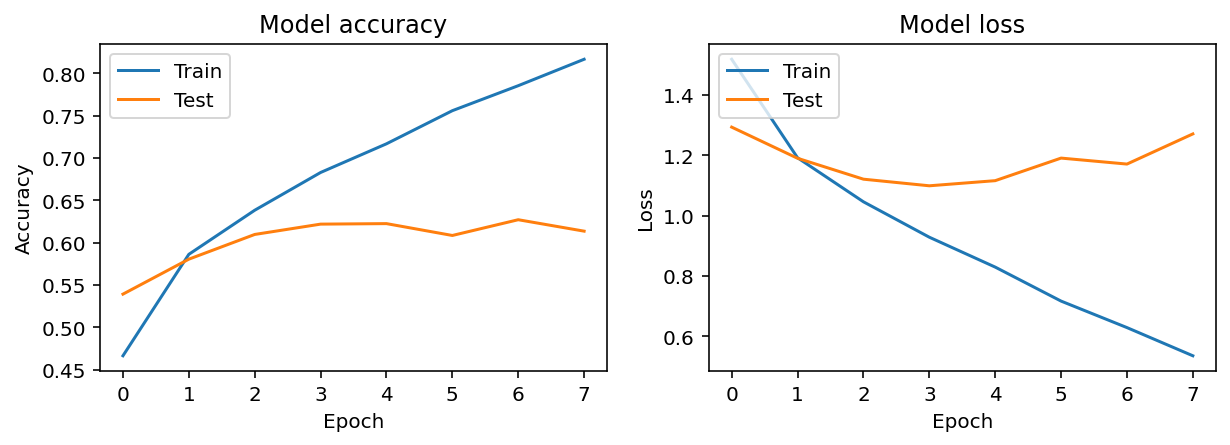

In [32]:
plot_history(simple_cnn_model_history, 'CNN')

In [33]:
#Adding one layer of inception module

In [62]:
from keras.layers import Input
input_img = Input(shape = (32, 32, 3))
from keras.layers import Conv2D, MaxPooling2D
incep_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
incep_1 = Conv2D(64, (3,3), padding='same', activation='relu')(incep_1)
incep_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
incep_2 = Conv2D(64, (5,5), padding='same', activation='relu')(incep_2)
incep_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
incep_3 = Conv2D(64, (1,1), padding='same', activation='relu')(incep_3)


In [ ]:
import keras
from keras.layers import Flatten, Dense
from keras.models import Model
output = keras.layers.concatenate([incep_1, incep_2, incep_3], axis = 3)

output = Flatten()(output)
out1    = Dense(256, activation='relu')(output)
out2    = Dense(100, activation='relu')(out1)
out    = Dense(10, activation='softmax')(out2)
model = Model(inputs = input_img, outputs = out)

epochs = 5
lrate = 0.03
sgd = keras.optimizers.SGD(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
cnn1 = model.fit(train_x_reshaped, train_y, validation_data=(test_x_reshaped, test_y), epochs=epochs)


Epoch 1/5
1563/1563 [==============================] - 805s 515ms/step - loss: 1.9764 - accuracy: 0.2760 - val_loss: 1.4513 - val_accuracy: 0.4813
Epoch 2/5
1563/1563 [==============================] - 799s 511ms/step - loss: 1.4386 - accuracy: 0.4924 - val_loss: 1.3494 - val_accuracy: 0.5231
Epoch 3/5
 397/1563 [======>.......................] - ETA: 9:30 - loss: 1.2648 - accuracy: 0.5532

In [ ]:
plot_history(cnn1, 'CNN')